In [2]:
import os
import random

import pickle
import numpy as np
import scipy.io as spio
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# import tensorflow as tf

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

custom_seed = 42
np.random.seed(custom_seed)
# tf.random.set_seed(custom_seed)

In [3]:
# Función para cargar datos y resultados
def cargar_datos_y_resultados(nombre_modelo):
    carpeta_datos = r'C:\Users\usuario\Desktop\rmunozTMELab\PGNNIV_2D\data_1e4'
    nombre_archivo_datos = f'{nombre_modelo}_data.pkl'
    archivo_pickle = os.path.join(carpeta_datos, nombre_archivo_datos)

    with open(archivo_pickle, 'rb') as f:
        data = pickle.load(f)

    # Load first training
    carpeta_resultados = r'C:\Users\usuario\Desktop\rmunozTMELab\PGNNIV_2D\results_28052024'
    nombre_archivo_first_train = f'{nombre_modelo}_results\{nombre_modelo}_first_train.pkl'
    archivo_pickle = os.path.join(carpeta_resultados, nombre_archivo_first_train)

    with open(archivo_pickle, 'rb') as f:
        results_first_train_pkl = pickle.load(f)

    results_first_train = results_first_train_pkl['training']
    predictions_predictive_first_train = results_first_train_pkl['predictions_pred']
    predictions_explanatory_first_train = results_first_train_pkl['predictions_exp']

    # # Load new training
    carpeta_resultados = r'C:\Users\usuario\Desktop\rmunozTMELab\PGNNIV_2D\results_28052024'
    nombre_archivo_new_train = f'{nombre_modelo}_results\{nombre_modelo}_new_train.pkl'
    archivo_pickle = os.path.join(carpeta_resultados, nombre_archivo_new_train)

    with open(archivo_pickle, 'rb') as f:
        results_new_train_pkl = pickle.load(f)

    results_new_train = results_new_train_pkl['training']
    predictions_predictive_new_train = results_new_train_pkl['predictions_pred']
    predictions_explanatory_new_train = results_new_train_pkl['predictions_exp']

    return data, results_first_train, predictions_predictive_first_train, predictions_explanatory_first_train, results_new_train, predictions_predictive_new_train, predictions_explanatory_new_train

<string>:12: SyntaxWarning: invalid escape sequence '\{'
<string>:24: SyntaxWarning: invalid escape sequence '\{'
<>:12: SyntaxWarning: invalid escape sequence '\{'
<>:24: SyntaxWarning: invalid escape sequence '\{'
<string>:12: SyntaxWarning: invalid escape sequence '\{'
<string>:24: SyntaxWarning: invalid escape sequence '\{'
<>:12: SyntaxWarning: invalid escape sequence '\{'
<>:24: SyntaxWarning: invalid escape sequence '\{'
C:\Users\usuario\AppData\Local\Temp\ipykernel_7020\2765079293.py:12: SyntaxWarning: invalid escape sequence '\{'
  nombre_archivo_first_train = f'{nombre_modelo}_results\{nombre_modelo}_first_train.pkl'
C:\Users\usuario\AppData\Local\Temp\ipykernel_7020\2765079293.py:24: SyntaxWarning: invalid escape sequence '\{'
  nombre_archivo_new_train = f'{nombre_modelo}_results\{nombre_modelo}_new_train.pkl'


In [4]:
# Llamar a la función para el modelo "non_lineal"
data_non_lineal, results_first_train_non_lineal, predictions_predictive_first_train_non_lineal, predictions_explanatory_first_train_non_lineal, results_new_train_non_lineal, predictions_predictive_new_train_non_lineal, predictions_explanatory_new_train_non_lineal = cargar_datos_y_resultados("non_lineal")

# Llamar a la función para el modelo "two_dimensions_non_lineal"
data_nontwo_dimensions_non_lineal, results_first_train_nontwo_dimensions_non_lineal, predictions_predictive_first_train_nontwo_dimensions_non_lineal, predictions_explanatory_first_train_nontwo_dimensions_non_lineal, results_new_train_nontwo_dimensions_non_lineal, predictions_predictive_new_train_nontwo_dimensions_non_lineal, predictions_explanatory_new_train_nontwo_dimensions_non_lineal = cargar_datos_y_resultados("two_dimensions_non_lineal")

# Llamar a la función para el modelo "two_dimension_heterogeneous"
data_two_dimension_heterogeneous, results_first_train_two_dimension_heterogeneous, predictions_predictive_first_train_two_dimension_heterogeneous, predictions_explanatory_first_train_two_dimension_heterogeneous, results_new_train_two_dimension_heterogeneous, predictions_predictive_new_train_two_dimension_heterogeneous, predictions_explanatory_new_train_two_dimension_heterogeneous = cargar_datos_y_resultados("two_dimensions_heterogeneous")

# Llamar a la función para el modelo "lineal_heterogeneous"
data_lineal_heterogeneous, results_first_train_lineal_heterogeneous, predictions_predictive_first_train_lineal_heterogeneous, predictions_explanatory_first_train_lineal_heterogeneous, results_new_train_lineal_heterogeneous, predictions_predictive_new_train_lineal_heterogeneous, predictions_explanatory_new_train_lineal_heterogeneous = cargar_datos_y_resultados("lineal_heterogeneous")

# Llamar a la función para el modelo "lineal_homogeneous"
data_lineal_homogeneous, results_first_train_lineal_homogeneous, predictions_predictive_first_train_lineal_homogeneous, predictions_explanatory_first_train_lineal_homogeneous, results_new_train_lineal_homogeneous, predictions_predictive_new_train_lineal_homogeneous, predictions_explanatory_new_train_lineal_homogeneous = cargar_datos_y_resultados("lineal_homogeneous")

# Llamar a la función para el modelo "tensorial"
data_tensorial, results_first_train_tensorial, predictions_predictive_first_train_tensorial, predictions_explanatory_first_train_tensorial, results_new_train_tensorial, predictions_predictive_new_train_tensorial, predictions_explanatory_new_train_tensorial = cargar_datos_y_resultados("tensorial")


In [5]:
# Llamar a la función para el modelo "two_dimensions_non_lineal_P4"
data_nontwo_dimensions_non_lineal_P4, results_first_train_nontwo_dimensions_non_lineal_P4, predictions_predictive_first_train_nontwo_dimensions_non_lineal_P4, predictions_explanatory_first_train_nontwo_dimensions_non_lineal_P4, results_new_train_nontwo_dimensions_non_lineal_P4, predictions_predictive_new_train_nontwo_dimensions_non_lineal_P4, predictions_explanatory_new_train_nontwo_dimensions_non_lineal_P4 = cargar_datos_y_resultados("two_dimensions_non_lineal_P4_02102024")


In [6]:
n_data = data_non_lineal['n_data']
n_discretization = data_non_lineal['n_discretization']
x_step_size = data_non_lineal['x_step_size']
y_step_size = data_non_lineal['y_step_size']

In [7]:
# # Finite difference convolutional operator to derivate in x axis
# def Dx(f, x_step_size=x_step_size):
#     Dx = tf.constant([[-1, +1], 
#                       [-1, +1]], 
#                      dtype=tf.float32)/(2*x_step_size)

#     f_reshaped = tf.expand_dims(f[:, :, :], axis=-1)    
#     Dx = tf.expand_dims(tf.expand_dims(Dx, axis=-1), axis=-1)
#     dfdx = tf.nn.conv2d(f_reshaped, Dx, strides=[1, 1, 1, 1], padding='VALID', name='dfdx')
#     return tf.squeeze(dfdx, axis=-1)

# # Finite difference convolutional operator to derivate in y axis
# def Dy(f, y_step_size=y_step_size):
#     Dy = tf.constant([[+1, +1], 
#                       [-1, -1]],  
#                      dtype=tf.float32)/(-2*y_step_size)

#     f_reshaped = tf.expand_dims(f[:, :, :], axis=-1)    
#     Dy = tf.expand_dims(tf.expand_dims(Dy, axis=-1), axis=-1)
#     dfdy = tf.nn.conv2d(f_reshaped, Dy, strides=[1, 1, 1, 1], padding='VALID', name='dfdy')
#     return tf.squeeze(dfdy, axis=-1)

# # Convolutional operator to do the mean between two elements of a mesh in x axis
# def Mx(f):
#     Mx = tf.constant([[+1, +1]], 
#                      dtype=tf.float32)/(2)

#     f_reshaped = tf.expand_dims(f[:, :, :], axis=-1)    
#     Mx = tf.expand_dims(tf.expand_dims(Mx, axis=-1), axis=-1)
#     x_avg = tf.nn.conv2d(f_reshaped, Mx, strides=[1, 1, 1, 1], padding='VALID', name='Mx')
#     return tf.squeeze(x_avg, axis=-1)

# # Convolutional operator to do the mean between two elements of a mesh in y axis
# def My(f):
#     My = tf.constant([[+1], 
#                       [+1]], 
#                      dtype=tf.float32)/(2)

#     f_reshaped = tf.expand_dims(f[:, :, :], axis=-1)    
#     My = tf.expand_dims(tf.expand_dims(My, axis=-1), axis=-1)
#     y_avg = tf.nn.conv2d(f_reshaped, My, strides=[1, 1, 1, 1], padding='VALID', name='My')
#     return tf.squeeze(y_avg, axis=-1)

In [8]:
def smooth_curve(data, window_size=50):
    window = np.ones(window_size) / window_size
    return np.convolve(data, window, mode='valid')

def cm_to_in(cm):
    return cm * 0.393701

def normalize_list(lst):
    max_value = max(lst)
    return [x / max_value for x in lst]

Parámetros de las gráficas

In [9]:
linewidth = 1.5  
title_fontsize = 14  
label_fontsize = 14  
legend_fontsize = 12 
tick_fontsize = 11  

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

posX = cm_to_in(10) # posición de la esquina inferior izquierda de la imagen en X
posY = cm_to_in(10) # posición de la esquina inferior izquierda de la imagen en Y
width = cm_to_in(12)  # ancho de la imagen
height = cm_to_in(8) # alto de la imagen

color = [0.1, 0, 0.8]  # triplete RGB, valores entre 0 y 1
subplot_adjust_left = cm_to_in(0.15)
subplot_adjust_bottom = cm_to_in(0.15)

Análisis de las curvas de entrenamiento (non lineal)

In [10]:
# Combinar los resultados de los modelos no lineales
train_total_loss_list_non_lineal = results_first_train_non_lineal['train_total_loss_list'] + results_new_train_non_lineal['train_total_loss_list']
test_total_loss_list_non_lineal = results_first_train_non_lineal['test_total_loss_list'] + results_new_train_non_lineal['test_total_loss_list']
train_total_MSE_list_non_lineal = results_first_train_non_lineal['train_total_MSE_list'] + results_new_train_non_lineal['train_total_MSE_list']
test_total_MSE_list_non_lineal = results_first_train_non_lineal['test_total_MSE_list'] + results_new_train_non_lineal['test_total_MSE_list']

train_total_loss_list_nontwo_dimensions_non_lineal = results_first_train_nontwo_dimensions_non_lineal['train_total_loss_list'] + results_new_train_nontwo_dimensions_non_lineal['train_total_loss_list']
test_total_loss_list_nontwo_dimensions_non_lineal = results_first_train_nontwo_dimensions_non_lineal['test_total_loss_list'] + results_new_train_nontwo_dimensions_non_lineal['test_total_loss_list']
train_total_MSE_list_nontwo_dimensions_non_lineal = results_first_train_nontwo_dimensions_non_lineal['train_total_MSE_list'] + results_new_train_nontwo_dimensions_non_lineal['train_total_MSE_list']
test_total_MSE_list_nontwo_dimensions_non_lineal = results_first_train_nontwo_dimensions_non_lineal['test_total_MSE_list'] + results_new_train_nontwo_dimensions_non_lineal['test_total_MSE_list']

# Combinar los resultados del modelo two_dimension_heterogeneous
train_total_loss_list_two_dimension_heterogeneous = results_first_train_two_dimension_heterogeneous['train_total_loss_list'] + results_new_train_two_dimension_heterogeneous['train_total_loss_list']
test_total_loss_list_two_dimension_heterogeneous = results_first_train_two_dimension_heterogeneous['test_total_loss_list'] + results_new_train_two_dimension_heterogeneous['test_total_loss_list']
train_total_MSE_list_two_dimension_heterogeneous = results_first_train_two_dimension_heterogeneous['train_total_MSE_list'] + results_new_train_two_dimension_heterogeneous['train_total_MSE_list']
test_total_MSE_list_two_dimension_heterogeneous = results_first_train_two_dimension_heterogeneous['test_total_MSE_list'] + results_new_train_two_dimension_heterogeneous['test_total_MSE_list']

# Combinar los resultados del modelo lineal_heterogeneous
train_total_loss_list_lineal_heterogeneous = results_first_train_lineal_heterogeneous['train_total_loss_list'] + results_new_train_lineal_heterogeneous['train_total_loss_list']
test_total_loss_list_lineal_heterogeneous = results_first_train_lineal_heterogeneous['test_total_loss_list'] + results_new_train_lineal_heterogeneous['test_total_loss_list']
train_total_MSE_list_lineal_heterogeneous = results_first_train_lineal_heterogeneous['train_total_MSE_list'] + results_new_train_lineal_heterogeneous['train_total_MSE_list']
test_total_MSE_list_lineal_heterogeneous = results_first_train_lineal_heterogeneous['test_total_MSE_list'] + results_new_train_lineal_heterogeneous['test_total_MSE_list']

# Combinar los resultados del modelo lineal_homogeneous
train_total_loss_list_lineal_homogeneous = results_first_train_lineal_homogeneous['train_total_loss_list'] + results_new_train_lineal_homogeneous['train_total_loss_list']
test_total_loss_list_lineal_homogeneous = results_first_train_lineal_homogeneous['test_total_loss_list'] + results_new_train_lineal_homogeneous['test_total_loss_list']
train_total_MSE_list_lineal_homogeneous = results_first_train_lineal_homogeneous['train_total_MSE_list'] + results_new_train_lineal_homogeneous['train_total_MSE_list']
test_total_MSE_list_lineal_homogeneous = results_first_train_lineal_homogeneous['test_total_MSE_list'] + results_new_train_lineal_homogeneous['test_total_MSE_list']

# Cargar y combinar los resultados para el modelo tensorial
data_tensorial, results_first_train_tensorial, predictions_predictive_first_train_tensorial, predictions_explanatory_first_train_tensorial, results_new_train_tensorial, predictions_predictive_new_train_tensorial, predictions_explanatory_new_train_tensorial = cargar_datos_y_resultados("tensorial")
train_total_loss_list_tensorial = results_first_train_tensorial['train_total_loss_list'] + results_new_train_tensorial['train_total_loss_list']
test_total_loss_list_tensorial = results_first_train_tensorial['test_total_loss_list'] + results_new_train_tensorial['test_total_loss_list']
train_total_MSE_list_tensorial = results_first_train_tensorial['train_total_MSE_list'] + results_new_train_tensorial['train_total_MSE_list']
test_total_MSE_list_tensorial = results_first_train_tensorial['test_total_MSE_list'] + results_new_train_tensorial['test_total_MSE_list']

# Combinar los resultados de los modelos no lineales

train_total_loss_list_nontwo_dimensions_non_lineal_P4 = results_first_train_nontwo_dimensions_non_lineal_P4['train_total_loss_list'] + results_new_train_nontwo_dimensions_non_lineal_P4['train_total_loss_list']
test_total_loss_list_nontwo_dimensions_non_lineal_P4 = results_first_train_nontwo_dimensions_non_lineal_P4['test_total_loss_list'] + results_new_train_nontwo_dimensions_non_lineal_P4['test_total_loss_list']
train_total_MSE_list_nontwo_dimensions_non_lineal_P4 = results_first_train_nontwo_dimensions_non_lineal_P4['train_total_MSE_list'] + results_new_train_nontwo_dimensions_non_lineal_P4['train_total_MSE_list']
test_total_MSE_list_nontwo_dimensions_non_lineal_P4 = results_first_train_nontwo_dimensions_non_lineal_P4['test_total_MSE_list'] + results_new_train_nontwo_dimensions_non_lineal_P4['test_total_MSE_list']



In [11]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from matplotlib.ticker import ScalarFormatter
import matplotlib.colors as mcolors

# Imports de la libreria propia
from vecopsciml.kernels.derivative import DerivativeKernels
from vecopsciml.utils import TensOps
from vecopsciml.operators import zero_order as zo
from vecopsciml.algebra import zero_order as azo

# Imports de las funciones creadas para este programa
from models.non_constant_diffusivity import NonConstantDiffusivityNeuralNetwork
from utils.folders import create_folder
from utils.load_data import load_data
from utils.checkpoints import load_results
from trainers.train import train_loop

# Creamos los paths para las distintas carpetas
ROOT_PATH = r'C:\Users\usuario\Desktop\rmunozTMELab\Physically-Guided-Machine-Learning'
DATA_PATH = os.path.join(ROOT_PATH, r'data\non_linear\non_linear.pkl')
RESULTS_FOLDER_PATH = os.path.join(ROOT_PATH, r'results\non_linear')
MODEL_RESULTS_PATH = os.path.join(ROOT_PATH, r'results\non_linear\model_paper')

# Creamos las carpetas que sean necesarias (si ya están creadas se avisará de ello)
create_folder(RESULTS_FOLDER_PATH)
create_folder(MODEL_RESULTS_PATH)

# Load dataset
dataset = load_data(DATA_PATH)

# Convolutional filters to derivate
dx = dataset['x_step_size']
dy = dataset['y_step_size']
D = DerivativeKernels(dx, dy, 0).grad_kernels_two_dimensions()

# Tratamiento de los datos para dividirlos en train y test
X_train = torch.Tensor(dataset['X_train']).unsqueeze(1)
y_train = TensOps(torch.tensor(dataset['y_train'], dtype=torch.float32, requires_grad=True).unsqueeze(1), space_dimension=2, contravariance=0, covariance=0)
K_train = TensOps(torch.tensor(dataset['k_train'], dtype=torch.float32, requires_grad=True).unsqueeze(1), space_dimension=2, contravariance=0, covariance=0)

X_val = torch.Tensor(dataset['X_val']).unsqueeze(1)
y_val = TensOps(torch.tensor(dataset['y_val'], dtype=torch.float32, requires_grad=True).unsqueeze(1), space_dimension=2, contravariance=0, covariance=0)
K_val = TensOps(torch.tensor(dataset['k_val'], dtype=torch.float32, requires_grad=True).unsqueeze(1), space_dimension=2, contravariance=0, covariance=0)

X_np = X_train
y_np = y_train.values
K_np = K_train.values

X_train_np, X_test_np, y_train_np, y_test_np, K_train_np, K_test_np = train_test_split(X_np, y_np, K_np, test_size=0.2, random_state=42)

X_train = X_train_np
X_test = X_test_np

y_train = TensOps(y_train_np, space_dimension=y_train.space_dim, contravariance=0, covariance=0)
y_test = TensOps(y_test_np, space_dimension=y_train.space_dim, contravariance=0, covariance=0)

K_train = TensOps(K_train_np, space_dimension=K_train.space_dim, contravariance=0, covariance=0)
K_test = TensOps(K_test_np, space_dimension=K_train.space_dim, contravariance=0, covariance=0)

# Arquitectura del modelo
input_shape = X_train[0].shape  # [1, 10, 8]
hidden1_dim = 150
hidden2_dim = 150
output_shape = y_train.values[0].shape  # [1, 10, 10]

# Se carga el modelo y el optimizador
model = NonConstantDiffusivityNeuralNetwork(input_shape, hidden1_dim, hidden2_dim, output_shape, n_filters=5)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)

model, optimizer, lists = load_results(model, optimizer, MODEL_RESULTS_PATH, map_location=torch.device('cpu'))

train_total_loss_list = lists['train_total_loss_list']

Folder already exists at: C:\Users\usuario\Desktop\rmunozTMELab\Physically-Guided-Machine-Learning\results\non_linear
Folder already exists at: C:\Users\usuario\Desktop\rmunozTMELab\Physically-Guided-Machine-Learning\results\non_linear\model_paper
Data successfully loaded from: C:\Users\usuario\Desktop\rmunozTMELab\Physically-Guided-Machine-Learning\data\non_linear\non_linear.pkl


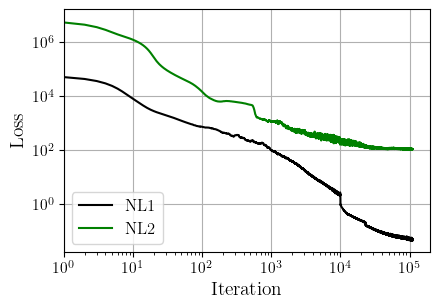

In [12]:
plt.figure(figsize=(width, height))
# plt.subplots_adjust(left=subplot_adjust_left, bottom=subplot_adjust_bottom) 

# plt.plot(smooth_curve(train_total_loss_list_non_lineal), label='P5', color='red', linestyle='-')
plt.plot(smooth_curve(train_total_loss_list_nontwo_dimensions_non_lineal)/3000, label='NL1', color='black', linestyle='-')
plt.plot(smooth_curve(train_total_loss_list), label='NL2', color='green', linestyle='-')

plt.xlabel('Iteration', fontsize=label_fontsize)
plt.ylabel('Loss', fontsize=label_fontsize)
# plt.title('Lineal homogeneous learning curve (MSE)', fontsize=title_fontsize)

plt.grid(True)
plt.legend(loc='lower left', fontsize=legend_fontsize)
plt.tick_params(axis='both', which='major', labelsize=tick_fontsize)

plt.xscale('log')
plt.yscale('log')
plt.xlim(left=1) 

plt.savefig(os.path.join(MODEL_RESULTS_PATH, f'training_nonlinear.pdf'), bbox_inches='tight', dpi=600)
plt.show()

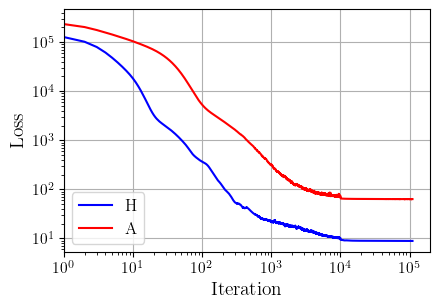

In [13]:
plt.figure(figsize=(width, height))
# plt.subplots_adjust(left=subplot_adjust_left, bottom=subplot_adjust_bottom) 

# plt.plot(smooth_curve(train_total_loss_list_lineal_homogeneous), label='P1', color='red', linestyle='-')
# plt.plot(smooth_curve(train_total_loss_list_lineal_heterogeneous), label='P2', color='blue', linestyle='-')
plt.plot(smooth_curve(train_total_loss_list_two_dimension_heterogeneous)/3000, label='H', color='blue', linestyle='-')
plt.plot(smooth_curve(train_total_loss_list_tensorial)/3000, label='A', color='red', linestyle='-')

# plt.plot(test_total_loss_list_lineal_homogeneous, label='Total loss train', color='blue', linestyle=':')
# plt.plot(test_total_loss_list_lineal_heterogeneous, label='Total loss train', color='red', linestyle=':')
# plt.plot(test_total_loss_list_tensorial, label='Total loss train', color='black', linestyle=':')

plt.xlabel('Iteration', fontsize=label_fontsize)
plt.ylabel('Loss', fontsize=label_fontsize)

plt.grid(True)
plt.legend(loc='lower left', fontsize=legend_fontsize)
plt.tick_params(axis='both', which='major', labelsize=tick_fontsize)

plt.xscale('log')
plt.yscale('log')
plt.xlim(left=1) 

# plt.savefig(os.path.join(r'overleaf_plots', f'homogeneous_heterogeneous_problems_training.pdf'), bbox_inches='tight', dpi=600)
plt.savefig(os.path.join(MODEL_RESULTS_PATH, f'homogeneous_heterogeneous_problems_training.pdf'), bbox_inches='tight', dpi=600)
plt.show()